In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_AN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,1,1,2,0,0,0,3.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2,0.0,7
2,2,2,1,0,0,0,3.0,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,3.0,3.0,2,0.0,7
3,2,2,2,1,0,0,2.0,0.0,2.0,2.0,...,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2,0.0,7
4,2,2,1,0,0,0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,2.0,2,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3,0.0,70
354,2,3,2,0,0,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,70
355,2,2,2,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2,0.0,70
356,2,1,0,3,0,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,70


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
int64		column 4	0
int64		column 5	0
int64		column 6	0
float64		column 7	17
float64		column 8	69
float64		column 9	69
float64		column 10	69
int64		column 11	0
float64		column 12	69
int64		column 13	0
int64		column 14	0
int64		column 15	0
float64		column 16	69
int64		column 17	0
int64		column 18	0
float64		column 19	34
int64		column 20	0
float64		column 21	69
float64		column 22	69
float64		column 23	35
float64		column 24	69
float64		column 25	69
float64		column 26	69
float64		column 27	69
float64		column 28	69
float64		column 29	69
float64		column 30	69
float64		column 31	52
int64		column 32	0
float64		column 33	69
int64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,341.000000,289.000000,289.000000,289.000000,...,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,306.000000,358.000000,289.000000,358.000000
mean,2.078212,1.807263,1.569832,1.354749,0.636872,0.449721,0.173021,0.377163,0.605536,0.515571,...,0.380623,0.446367,0.422145,0.955017,0.435986,0.103806,0.107843,1.877095,0.519031,36.296089
std,0.664865,0.701541,0.900909,1.135062,0.908709,0.956468,0.581053,0.841397,0.980772,0.917007,...,0.841897,0.852730,0.910010,1.131026,0.933679,0.452178,0.470233,0.699324,1.077138,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

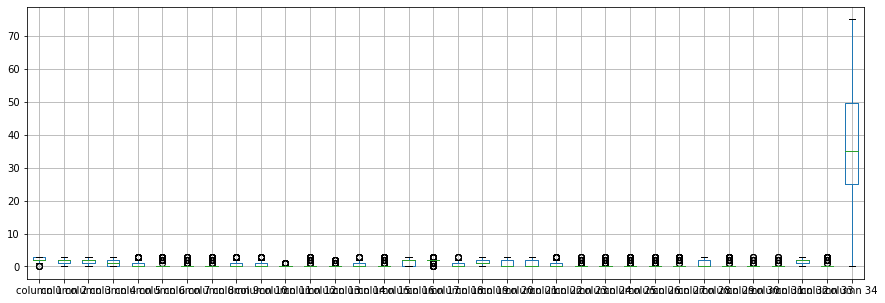

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078212
column 2      1.807263
column 3      1.569832
column 4      1.354749
column 5      0.636872
column 6      0.449721
column 7      0.173021
column 8      0.377163
column 9      0.605536
column 10     0.515571
column 11     0.122905
column 12     0.380623
column 13     0.142458
column 14     0.547486
column 15     0.315642
column 16     1.366782
column 17     1.955307
column 18     0.511173
column 19     1.302469
column 20     0.662011
column 21     0.979239
column 22     0.626298
column 23     0.291022
column 24     0.349481
column 25     0.380623
column 26     0.446367
column 27     0.422145
column 28     0.955017
column 29     0.435986
column 30     0.103806
column 31     0.107843
column 32     1.877095
column 33     0.519031
column 34    36.296089
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.028225,-0.117324,-0.058963,0.135437,0.190862,...,-0.053459,0.174394,-0.038781,0.014178,-0.045167,-0.052574,-0.030918,0.093026,-0.030505,-0.005028
column 2,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.075013,-0.101175,-0.120455,0.283965,0.304471,...,-0.107624,0.196449,-0.130648,0.037223,-0.144447,-0.036874,-0.040847,-0.008453,-0.159482,0.016006
column 3,0.248062,0.347106,1.000000,-0.058534,0.239778,0.322657,-0.172168,0.263155,0.309792,0.249224,...,0.265035,0.322383,0.276243,-0.274370,0.256018,-0.081612,-0.107070,0.124812,0.263681,0.138493
column 4,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.412525,-0.139185,0.354682,-0.291970,-0.165944,...,0.356635,-0.178600,0.353965,0.000463,0.359278,-0.160185,-0.169979,0.051553,0.382920,0.048053
column 5,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.388233,-0.178195,0.333635,-0.037324,0.025302,...,0.353107,0.013266,0.327833,0.018038,0.349755,-0.145503,-0.160164,0.110295,0.329830,0.081162
column 6,0.028225,-0.075013,0.322657,0.412525,0.388233,1.000000,-0.140693,0.875137,-0.259211,-0.256368,...,0.872744,-0.110351,0.902862,0.105217,0.884937,-0.088545,-0.104518,0.258753,0.901252,0.096953
column 7,-0.117324,-0.101175,-0.172168,-0.139185,-0.178195,-0.140693,1.000000,-0.133006,0.236648,0.024677,...,-0.112569,-0.155319,-0.137644,-0.057800,-0.138554,0.748781,0.826624,-0.092104,-0.126111,-0.372630
column 8,-0.058963,-0.120455,0.263155,0.354682,0.333635,0.875137,-0.133006,1.000000,-0.277719,-0.252900,...,0.884818,-0.119311,0.902367,0.149242,0.890504,-0.075885,-0.103684,0.300629,0.898132,0.087194
column 9,0.135437,0.283965,0.309792,-0.291970,-0.037324,-0.259211,0.236648,-0.277719,1.000000,0.636148,...,-0.250664,0.476974,-0.271843,-0.422973,-0.266552,0.249241,0.277279,-0.096618,-0.268957,-0.074083
column 10,0.190862,0.304471,0.249224,-0.165944,0.025302,-0.256368,0.024677,-0.252900,0.636148,1.000000,...,-0.255069,0.472865,-0.261720,-0.419474,-0.263449,-0.037407,0.003955,0.038711,-0.264828,0.037587


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+35,34+35+35,34+35+35+35,34+35+35+35+35,34+35+35+35+35+35,34+35+35+35+35+35+35,34+35+35+35+35+35+35+35,34+35+35+35+35+35+35,34+35+35+35+35+35,34+35+35+35+35,34+35+35+35,34+35+35,34+35,34], vae_layer = False, seed = 35)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 73.04678379405628
Epoch: 1 , loss: 72.602727023038
Epoch: 2 , loss: 73.11964277787642
Epoch: 3 , loss: 72.54066224531694
Epoch: 4 , loss: 72.63906999067827
Epoch: 5 , loss: 72.56166752901945
Epoch: 6 , loss: 71.56166891618209
Epoch: 7 , loss: 68.99149790677157
Epoch: 8 , loss: 67.0910569971258
Epoch: 9 , loss: 66.08101237903942
Epoch: 10 , loss: 65.52592312205921
Epoch: 11 , loss: 65.3321366743608
Epoch: 12 , loss: 64.92907281355424
Epoch: 13 , loss: 64.44575899297541
Epoch: 14 , loss: 64.2750960263339
Epoch: 15 , loss: 64.20000440424138
Epoch: 16 , loss: 64.07058802517977
Epoch: 17 , loss: 63.1857216574929
Epoch: 18 , loss: 62.92815347151323
Epoch: 19 , loss: 63.32687846097079
Epoch: 20 , loss: 62.95780476656827
Epoch: 21 , loss: 62.540942972356625
Epoch: 22 , loss: 62.43634258617055
Epoch: 23 , loss: 62.27972914955833
Epoch: 24 , loss: 61.76976810802113
Epoch: 25 , loss: 61.86391344937411
Epoch: 26 ,

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.0
column 2      1.0
column 3      1.0
column 4      1.0
column 5      0.0
column 6      0.0
column 7      2.0
column 8      0.0
column 9      3.0
column 10     2.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     1.0
column 15     0.0
column 16     1.0
column 17     1.0
column 18     1.0
column 19     1.0
column 20     0.0
column 21     0.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     1.0
column 32     1.0
column 33     1.0
column 34    12.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0,0,0,0,0.0,0.400667,-1.192245,-1.379465,...,0.383267,0.406099,0.444336,0.697124,0.469468,0.054823,0.004651,0,-1.468392,0
1,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
2,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
3,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
4,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
354,0,0,0,0,0,0,0.0,0.521373,-1.784728,-0.782286,...,0.476705,0.614728,0.620491,1.244719,0.693733,0.150271,0.051582,0,0.746729,0
355,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
356,0,0,0,0,0,0,0.0,0.163248,0.521471,0.471794,...,0.147491,0.306639,0.230240,0.639533,0.263890,0.059088,0.011227,0,0.221215,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(34.54479141507635, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.04556924155409805

In [18]:
new_df.iloc[66,:]

column 1      2.0
column 2      0.0
column 3      0.0
column 4      3.0
column 5      0.0
column 6      0.0
column 7      0.0
column 8      0.0
column 9      0.0
column 10     0.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     0.0
column 15     2.0
column 16     2.0
column 17     2.0
column 18     0.0
column 19     0.0
column 20     0.0
column 21     3.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     0.0
column 32     2.0
column 33     0.0
column 34    22.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0,0.0,0.400667,0.807755,0.620535,...,0.383267,0.406099,0.444336,0.697124,0.469468,0.054823,0.004651,0,0.531608,0
1,1,1,2,0,0,0,3.0,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2,0.000000,7
2,2,2,1,0,0,0,3.0,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,3.000000,2,0.000000,7
3,2,2,2,1,0,0,2.0,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000,2,0.000000,7
4,2,2,1,0,0,0,2.0,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,2.000000,2,0.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3,0.000000,70
354,2,3,2,0,0,0,0.0,0.521373,1.215272,1.217714,...,0.476705,0.614728,0.620491,1.244719,0.693733,0.150271,0.051582,1,0.746729,70
355,2,2,2,1,0,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2,0.000000,70
356,2,1,0,3,0,0,0.0,0.163248,0.521471,0.471794,...,0.147491,0.306639,0.230240,0.639533,0.263890,0.059088,0.011227,1,0.221215,70


In [20]:
imputations[-1].to_excel("DERM_AN_10(imp).xlsx", index=False, header=False)